# Movie Dataset Analysis

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format

#### Import Dataset

In [63]:
df = pd.read_csv("../Data/movies_complete.csv", parse_dates=["release_date"])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

Table with almost 45.000 Rows and 21 Columns

In [65]:
#add more Columns

df["profit_musd"] = df["revenue_musd"] - df["budget_musd"]
df["return"] = df.apply(lambda row: row["revenue_musd"] / row["budget_musd"], axis=1)
df["year_release"] = df["release_date"].dt.year

##### Check Dataset Anomaly

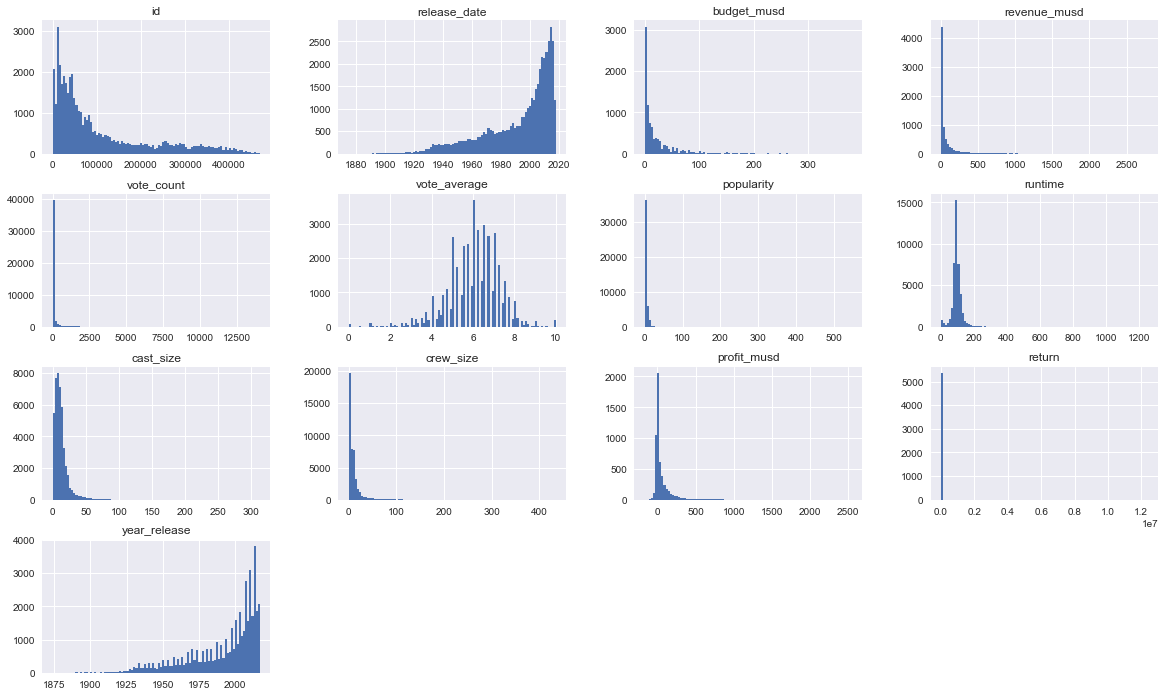

In [66]:
df.hist(figsize = (20,12), bins=100)
plt.show()

Not much Anomaly found and we can work with it, the only concern is there is many "0" values in some columns that will be into consideration to put into our analysis 

In [67]:
plt.style.use("seaborn")

#### Movies Made Each Year Chart 

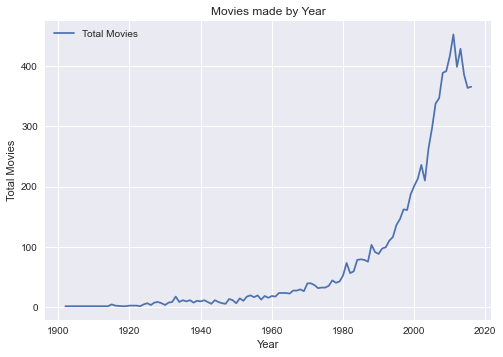

In [68]:
df1 = df[(df["year_release"] < 2017) & (df["budget_musd"] > 0)].groupby(by="year_release").agg(Total_Movie = ("title", "count"),
                                                                                        Average_Budget = ("budget_musd", "mean"))

plt.plot(df1.index, df1["Total_Movie"], label="Total Movies")

plt.title("Movies made by Year")

plt.xlabel("Year")
plt.ylabel("Total Movies")

plt.legend()

plt.show()

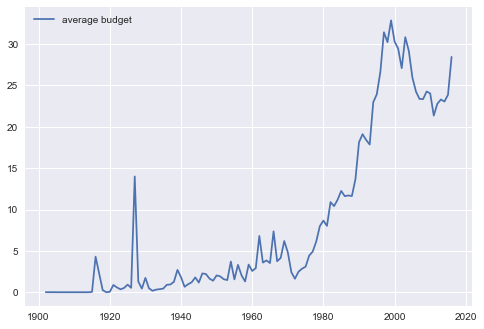

In [69]:
plt.plot(df1.index, df1["Average_Budget"], label="average budget")
plt.legend()
plt.show()

#### The Usual runtime for every movies

In [122]:
df["runtime"].value_counts(bins=100).head(10)

(88.85, 101.4]     15294
(76.3, 88.85]       7685
(101.4, 113.95]     7502
(113.95, 126.5]     3910
(63.75, 76.3]       2245
(126.5, 139.05]     1636
(51.2, 63.75]        972
(-0.256, 13.55]      777
(139.05, 151.6]      734
(38.65, 51.2]        434
Name: runtime, dtype: int64

#### Correlation Plot Beetwen Budget and Revenue 

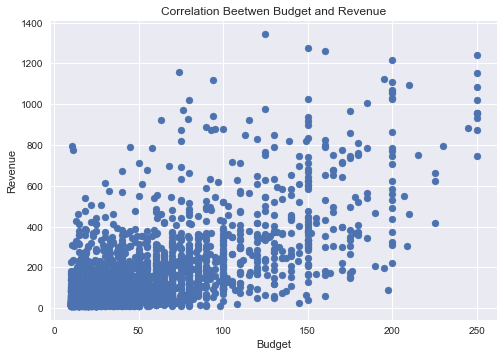

In [70]:
df2 = df[(df["revenue_musd"].between(10, 1500)) & (df["budget_musd"].between(10,250))].copy()

plt.scatter(df2["budget_musd"], df2["revenue_musd"])
plt.title("Correlation Beetwen Budget and Revenue")

plt.xlabel("Budget")
plt.ylabel("Revenue")

plt.show()

The plot seems positive but weak in association beetwen Budget and Revenue in movies production, and it also doesn't resemblance linear. many outliers in our data cause this

#### What Word Occur the Most in the Film's Title

In [71]:
from wordcloud import WordCloud

In [72]:
tag = df["title"].dropna()
titles = ' '.join(tag) #join / concatenate all tagline into one sentence

wcloud = WordCloud(background_color="white", height=2000, width=4000, max_words=200).generate(titles)

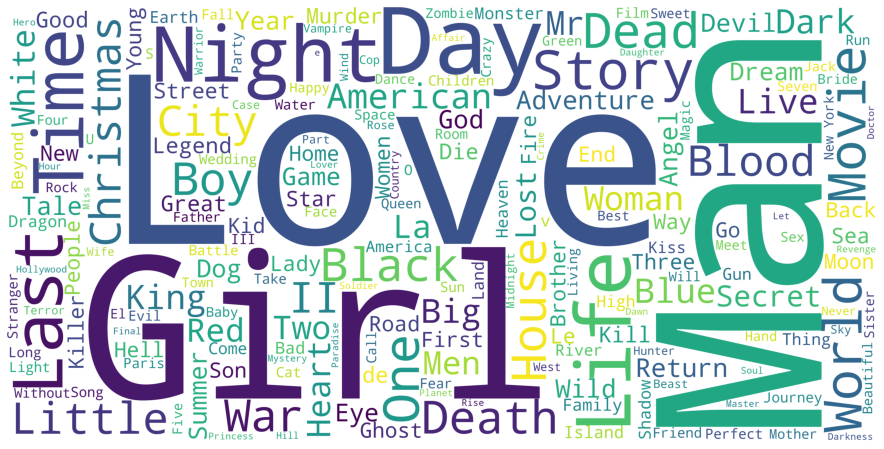

In [73]:
plt.figure(figsize=(16,8))
plt.imshow(wcloud)
plt.axis("off")
plt.show()

#### Analysis on Best to Worst Movies

In [74]:
from IPython.display import HTML

In [75]:
df_best = df[(df["revenue_musd"] > 0) & (df["budget_musd"] > 0)].copy()

In [76]:
def best_worst(n, by, ascending=False):
    df2= df_best[["title", "poster_path", "budget_musd", "revenue_musd", "profit_musd"]].sort_values(by = by, ascending = ascending).head(n).copy()
    
    df2.index = np.arange(1, len(df2) + 1)

    return HTML(df2.to_html(escape=False))

##### Highest Budget Movies

In [77]:
best_worst(5, "budget_musd")

,title,poster_path,budget_musd,revenue_musd,profit_musd
1,Pirates of the Caribbean: On Stranger Tides,,380.00,1045.71,665.71
2,Pirates of the Caribbean: At World's End,,300.00,961.00,661.00
3,Avengers: Age of Ultron,,280.00,1405.40,1125.40
4,Superman Returns,,270.00,391.08,121.08
5,Tangled,,260.00,591.79,331.79


##### Highest Revenue Movie

In [78]:
best_worst(5, "revenue_musd")

,title,poster_path,budget_musd,revenue_musd,profit_musd
1,Avatar,,237.00,2787.97,2550.97
2,Star Wars: The Force Awakens,,245.00,2068.22,1823.22
3,Titanic,,200.00,1845.03,1645.03
4,The Avengers,,220.00,1519.56,1299.56
5,Jurassic World,,150.00,1513.53,1363.53


##### Highest Provitable Movie

In [79]:
best_worst(5, "profit_musd")

,title,poster_path,budget_musd,revenue_musd,profit_musd
1,Avatar,,237.00,2787.97,2550.97
2,Star Wars: The Force Awakens,,245.00,2068.22,1823.22
3,Titanic,,200.00,1845.03,1645.03
4,Jurassic World,,150.00,1513.53,1363.53
5,Furious 7,,190.00,1506.25,1316.25


##### Worst Movie based on it Profitability

In [80]:
best_worst(5, "profit_musd", ascending=True)

,title,poster_path,budget_musd,revenue_musd,profit_musd
1,The Lone Ranger,,255.00,89.29,-165.71
2,The Alamo,,145.00,25.82,-119.18
3,Mars Needs Moms,,150.00,38.99,-111.01
4,Valerian and the City of a Thousand Planets,,197.47,90.02,-107.45
5,The 13th Warrior,,160.00,61.70,-98.30


#### Franchise Analysis

In [81]:
df["Franchise"] = df["belongs_to_collection"].apply(lambda x: "Franchise" if isinstance(x, str) else "Non Franchise")

In [82]:
df.groupby(by = "Franchise").revenue_musd.mean()

Franchise
Franchise       165.71
Non Franchise    44.74
Name: revenue_musd, dtype: float64

In [83]:
df.groupby(by = "Franchise").profit_musd.mean()

Franchise
Franchise       148.88
Non Franchise    32.95
Name: profit_musd, dtype: float64

In [84]:
df_franc = df.groupby(by = "Franchise").agg(Total_Movies = ("title", "count"), 
                                Average_Budget = ("budget_musd", "mean"),
                                Average_Revenue = ("revenue_musd", "mean"),
                                Popularity_Index = ("popularity", "mean"))

In [85]:
df_franc

,Total_Movies,Average_Budget,Average_Revenue,Popularity_Index
Franchise,,,,
Franchise,4463,38.32,165.71,6.25
Non Franchise,40228,18.05,44.74,2.59


In [86]:
df_franc.replace({False: 0, True: 1}, inplace=True)

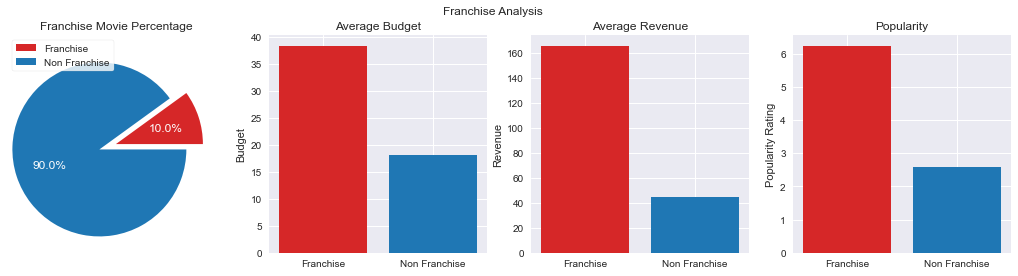

In [87]:
fig, (f1, f2, f3, f4) = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(18, 4)
f1.pie(df_franc["Total_Movies"], autopct="%1.1f%%", explode=[0,0.2], colors=["tab:red","tab:blue"], textprops={'color':"w", 'fontsize':'12'})
f2.bar(df_franc.index, df_franc["Average_Budget"], color = ["tab:red","tab:blue"])
f3.bar(df_franc.index, df_franc["Average_Revenue"], color = ["tab:red","tab:blue"])
f4.bar(df_franc.index, df_franc["Popularity_Index"], color = ["tab:red","tab:blue"])

legend_f1 = f1.legend(labels=df_franc.index, frameon = True, facecolor="white", loc="upper left")

f1.set_title("Franchise Movie Percentage")
f2.set_title("Average Budget")
f2.set_ylabel("Budget")
f3.set_title("Average Revenue")
f3.set_ylabel("Revenue")
f4.set_title("Popularity")
f4.set_ylabel("Popularity Rating")

fig.suptitle("Franchise Analysis")
plt.show()

On Average Franchise Movie always win on every aspect even only 10% of the total Movies is franchise movie, but it's proven to be more successfull

In [88]:
franchises = df.groupby(by = "belongs_to_collection").agg(Total_Movies = ("title", "count"), 
                                Average_Budget = ("budget_musd", "mean"),
                                Total_Budget = ("budget_musd", "sum"),
                                Average_Revenue = ("revenue_musd", "mean"),
                                Total_Revenue = ("revenue_musd", "sum"),
                                Average_Profit = ("profit_musd", "mean"),
                                Total_Profit = ("profit_musd", "sum"),
                                Popularity = ("popularity", "mean"))

We call if a Franchise is valid if it's have atleast 3 Movies

In [89]:
franchises.nlargest(5, columns="Total_Movies")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
The Bowery Boys,29,NaN,0.00,NaN,0.00,NaN,0.00,0.20
Totò Collection,27,NaN,0.00,NaN,0.00,NaN,0.00,1.05
James Bond Collection,26,59.22,1539.65,273.35,7106.97,214.13,5567.32,13.45
Zatôichi: The Blind Swordsman,26,NaN,0.00,NaN,0.00,NaN,0.00,1.10
The Carry On Collection,25,NaN,0.00,NaN,0.00,NaN,0.00,3.22


In [90]:
franchises.nlargest(5, columns="Total_Revenue")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
Harry Potter Collection,8,160.00,1280.00,963.42,7707.37,803.42,6427.37,26.25
Star Wars Collection,8,106.79,854.35,929.31,7434.49,822.52,6580.14,23.41
James Bond Collection,26,59.22,1539.65,273.35,7106.97,214.13,5567.32,13.45
The Fast and the Furious Collection,8,126.12,1009.00,640.64,5125.10,514.51,4116.10,10.80
Pirates of the Caribbean Collection,5,250.00,1250.00,904.32,4521.58,654.32,3271.58,53.97


In [91]:
franchises[franchises["Total_Movies"] >= 3].nlargest(5, columns="Average_Revenue")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
The Hobbit Collection,3,250.00,750.00,978.51,2935.52,728.51,2185.52,25.21
The Lord of the Rings Collection,3,88.67,266.00,972.18,2916.54,883.51,2650.54,30.27
Harry Potter Collection,8,160.00,1280.00,963.42,7707.37,803.42,6427.37,26.25
Star Wars Collection,8,106.79,854.35,929.31,7434.49,822.52,6580.14,23.41
Despicable Me Collection,6,74.75,299.00,922.77,3691.07,848.02,3392.07,106.72


In [92]:
franchises[franchises["Total_Movies"] >= 3].nlargest(5, columns="Average_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
The Lord of the Rings Collection,3,88.67,266.00,972.18,2916.54,883.51,2650.54,30.27
Despicable Me Collection,6,74.75,299.00,922.77,3691.07,848.02,3392.07,106.72
Star Wars Collection,8,106.79,854.35,929.31,7434.49,822.52,6580.14,23.41
Harry Potter Collection,8,160.00,1280.00,963.42,7707.37,803.42,6427.37,26.25
The Lion King Collection,4,45.00,45.00,788.24,788.24,743.24,743.24,11.48


In [93]:
franchises[franchises["Total_Movies"] >= 3].nlargest(5, columns="Total_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
Star Wars Collection,8,106.79,854.35,929.31,7434.49,822.52,6580.14,23.41
Harry Potter Collection,8,160.00,1280.00,963.42,7707.37,803.42,6427.37,26.25
James Bond Collection,26,59.22,1539.65,273.35,7106.97,214.13,5567.32,13.45
The Fast and the Furious Collection,8,126.12,1009.00,640.64,5125.10,514.51,4116.10,10.80
Transformers Collection,5,193.00,965.00,873.22,4366.10,680.22,3401.10,14.43


In [94]:
franchises[franchises["Total_Movies"] >= 3].nsmallest(5, columns="Average_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
Final Fantasy Collection,4,137.00,137.00,42.70,85.40,-51.87,-51.87,8.93
Tekken Collection,3,30.00,30.00,0.97,0.97,-29.03,-29.03,8.47
Swan Princess Series,3,37.50,75.00,9.77,9.77,-25.23,-25.23,5.24
BloodRayne Collection,3,15.00,45.00,2.41,2.41,-22.59,-22.59,5.66
Dungeons & Dragons Collection,3,23.50,47.00,15.19,15.19,-19.81,-19.81,5.34


#### Director Analysis

In [95]:
df["director"].value_counts().nlargest(10)

John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      49
Woody Allen         49
Jean-Luc Godard     46
Sidney Lumet        46
Charlie Chaplin     44
Raoul Walsh         43
Name: director, dtype: int64

In [96]:
dir = df.groupby(by = "director").agg(Total_Movies = ("title", "count"), 
                                Average_Budget = ("budget_musd", "mean"),
                                Total_Budget = ("budget_musd", "sum"),
                                Average_Revenue = ("revenue_musd", "mean"),
                                Total_Revenue = ("revenue_musd", "sum"),
                                Average_Profit = ("profit_musd", "mean"),
                                Total_Profit = ("profit_musd", "sum"),
                                Popularity = ("popularity", "mean"))

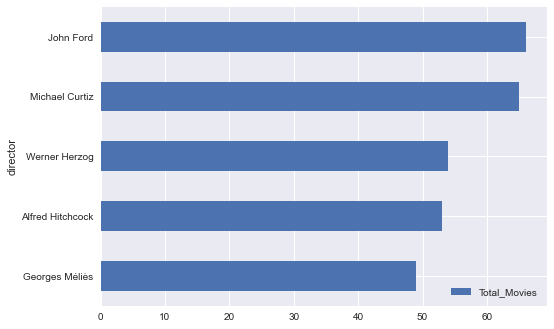

In [97]:
dir.nlargest(5, columns="Total_Movies").sort_values(by="Total_Movies", ascending=True).plot(y="Total_Movies", kind="barh")
plt.show()

In [98]:
dir.nlargest(5, columns="Total_Movies")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
director,,,,,,,,
John Ford,66,2.74,35.62,8.52,85.17,5.61,56.05,3.05
Michael Curtiz,65,1.54,10.80,7.56,37.82,5.45,27.25,2.11
Werner Herzog,54,4.86,58.38,6.14,24.57,-8.62,-17.23,2.32
Alfred Hitchcock,53,2.03,48.67,11.91,250.11,9.87,207.30,6.50
Georges Méliès,49,0.01,0.01,NaN,0.00,NaN,0.00,0.65


In [99]:
dir.nlargest(5, columns="Total_Revenue")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
director,,,,,,,,
Steven Spielberg,33,56.03,1736.95,308.55,9256.62,250.67,7520.12,13.02
Peter Jackson,13,102.06,1326.78,593.48,6528.24,472.93,5202.24,18.84
Michael Bay,13,128.46,1670.00,495.19,6437.47,366.73,4767.47,12.78
James Cameron,11,84.45,760.05,737.58,5900.61,642.59,5140.71,28.07
David Yates,9,189.17,1135.00,889.09,5334.56,699.93,4199.56,19.99


In [100]:
dir.nlargest(5, columns="Total_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
director,,,,,,,,
Steven Spielberg,33,56.03,1736.95,308.55,9256.62,250.67,7520.12,13.02
Peter Jackson,13,102.06,1326.78,593.48,6528.24,472.93,5202.24,18.84
James Cameron,11,84.45,760.05,737.58,5900.61,642.59,5140.71,28.07
Michael Bay,13,128.46,1670.00,495.19,6437.47,366.73,4767.47,12.78
David Yates,9,189.17,1135.00,889.09,5334.56,699.93,4199.56,19.99


#### Actor Analysis

In [101]:
df.set_index("id", inplace=True)

In [102]:
act = df["cast"].str.split("|", expand=True)

In [103]:
act = act.stack().reset_index(level=1, drop=True).to_frame()

In [104]:
act.columns = ["actor"]

In [105]:
act = act.merge(df[["title", "popularity", "revenue_musd", "budget_musd", "profit_musd"]], how="left", left_index=True, right_index=True) 

In [106]:
act["actor"].nunique()

201501

In [107]:
act["actor"].value_counts().head(10)

Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
Gérard Depardieu     109
John Carradine       109
Jackie Chan          108
Donald Sutherland    108
Frank Welker         107
Name: actor, dtype: int64

In [108]:
act = act.groupby(by = "actor").agg(Total_Movies = ("title", "count"), 
                                Average_Budget = ("budget_musd", "mean"),
                                Total_Budget = ("budget_musd", "sum"),
                                Average_Revenue = ("revenue_musd", "mean"),
                                Total_Revenue = ("revenue_musd", "sum"),
                                Average_Profit = ("profit_musd", "mean"),
                                Total_Profit = ("profit_musd", "sum"),
                                Popularity = ("popularity", "mean"))

In [109]:
act.nlargest(5, columns="Total_Revenue")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
actor,,,,,,,,
Stan Lee,48,152.80,4889.50,647.17,19414.96,484.37,14530.96,29.94
Samuel L. Jackson,122,59.95,4855.67,213.87,17109.62,172.64,12257.74,11.70
Warwick Davis,34,107.67,2476.37,662.80,13256.03,540.54,10810.78,13.09
Frank Welker,107,71.72,3083.93,326.10,13044.15,262.30,9967.52,9.57
John Ratzenberger,46,101.31,2938.00,449.86,12596.13,357.64,9656.33,10.96


In [110]:
act.nlargest(5, columns="Total_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
actor,,,,,,,,
Stan Lee,48,152.80,4889.50,647.17,19414.96,484.37,14530.96,29.94
Samuel L. Jackson,122,59.95,4855.67,213.87,17109.62,172.64,12257.74,11.70
Warwick Davis,34,107.67,2476.37,662.80,13256.03,540.54,10810.78,13.09
Frank Welker,107,71.72,3083.93,326.10,13044.15,262.30,9967.52,9.57
Jess Harnell,35,114.05,2509.00,611.73,12234.61,488.78,9775.61,10.92


In [111]:
act[act["Total_Movies"] >= 10].nlargest(5, columns="Popularity")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
actor,,,,,,,,
Katy Mixon,12,34.99,314.90,151.96,1519.57,133.76,1203.84,51.97
Terry Notary,11,147.64,1476.35,694.72,6947.21,547.09,5470.86,51.58
Goran D. Kleut,10,113.39,907.13,366.99,2568.94,237.42,1661.94,42.32
Mark Smith,11,48.69,486.90,243.95,2195.52,191.51,1723.62,40.08
Jon Hamm,25,51.85,829.53,191.63,3449.35,171.75,2576.26,39.42


#### Production House Analysis

In [112]:
prod = df["production_companies"].str.split("|", expand=True)

In [113]:
prod = prod.stack().reset_index(level=1, drop=True).to_frame()

In [114]:
prod = prod.merge(df[["title", "popularity", "revenue_musd", "budget_musd", "profit_musd"]], how="left", left_index=True, right_index=True) 

In [115]:
prod.rename(columns = {0:'production_companies'}, inplace = True)

In [117]:
prod = prod.groupby("production_companies").agg(Total_Movies = ("title", "count"), 
                                Average_Budget = ("budget_musd", "mean"),
                                Total_Budget = ("budget_musd", "sum"),
                                Average_Revenue = ("revenue_musd", "mean"),
                                Total_Revenue = ("revenue_musd", "sum"),
                                Average_Profit = ("profit_musd", "mean"),
                                Total_Profit = ("profit_musd", "sum"),
                                Popularity = ("popularity", "mean"))

In [119]:
prod.nlargest(5, columns="Total_Movies")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
production_companies,,,,,,,,
Warner Bros.,1248,48.37,23557.27,129.38,63525.19,93.28,38989.62,6.22
Metro-Goldwyn-Mayer (MGM),1073,23.64,5343.52,59.79,12376.79,42.04,6895.18,2.92
Paramount Pictures,996,40.65,16299.55,124.10,48769.40,94.36,31893.76,5.68
Twentieth Century Fox Film Corporation,834,40.65,13415.69,139.85,47687.75,112.60,33328.53,6.30
Universal Pictures,827,40.47,17604.42,119.35,55259.19,94.66,36537.01,7.76


In [120]:
prod.nlargest(5, columns="Total_Revenue")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
production_companies,,,,,,,,
Warner Bros.,1248,48.37,23557.27,129.38,63525.19,93.28,38989.62,6.22
Universal Pictures,827,40.47,17604.42,119.35,55259.19,94.66,36537.01,7.76
Paramount Pictures,996,40.65,16299.55,124.10,48769.40,94.36,31893.76,5.68
Twentieth Century Fox Film Corporation,834,40.65,13415.69,139.85,47687.75,112.60,33328.53,6.30
Walt Disney Pictures,262,82.50,12787.14,277.80,40837.27,212.60,28063.25,12.46


In [121]:
prod.nlargest(5, columns="Total_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
production_companies,,,,,,,,
Warner Bros.,1248,48.37,23557.27,129.38,63525.19,93.28,38989.62,6.22
Universal Pictures,827,40.47,17604.42,119.35,55259.19,94.66,36537.01,7.76
Twentieth Century Fox Film Corporation,834,40.65,13415.69,139.85,47687.75,112.60,33328.53,6.30
Paramount Pictures,996,40.65,16299.55,124.10,48769.40,94.36,31893.76,5.68
Walt Disney Pictures,262,82.50,12787.14,277.80,40837.27,212.60,28063.25,12.46


#### Genre Analysis

In [123]:
from datetime import datetime

In [124]:
def generation(x):
    if x >= datetime.strptime("01/01/2010", "%d/%m/%Y"):
        return "2010s"
    if x >= datetime.strptime("01/01/2000", "%d/%m/%Y"):
        return "2000s"
    if x >= datetime.strptime("01/01/1990", "%d/%m/%Y"):
        return "1990s"
    if x >= datetime.strptime("01/01/1980", "%d/%m/%Y"):
        return "1980s"
    else:
        return "Older than 70s"

df["gen_time"] = df["release_date"].apply(lambda x: generation(x))

In [125]:
gen = df["genres"].str.split("|", expand=True)

In [126]:
gen = gen.stack().reset_index(level=1, drop=True).to_frame()

In [127]:
gen = gen.merge(df[["title", "director", "budget_musd", "revenue_musd", "gen_time"]], how="left", left_index=True, right_index=True)

In [129]:
gen.rename(columns = {0:'genre'}, inplace = True)

In [130]:
gen["genre"].nunique()

20

In [131]:
tes = gen.pivot_table(values="title", index="genre", columns="gen_time", 
                aggfunc="count")

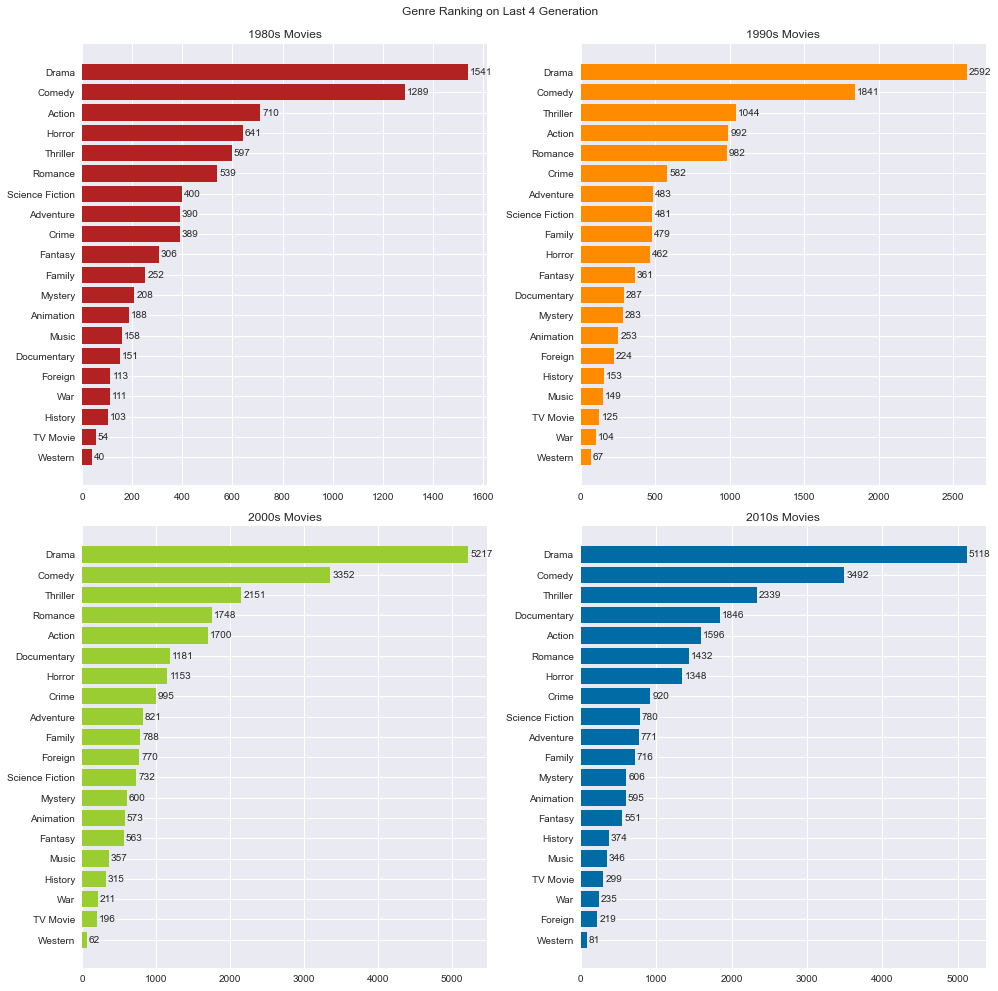

In [132]:
g80 = tes[["1980s"]].sort_values(by = "1980s")
g90 = tes[["1990s"]].sort_values(by = "1990s")
g00 = tes[["2000s"]].sort_values(by = "2000s")
g10 = tes[["2010s"]].sort_values(by = "2010s")

plt.style.use("tableau-colorblind10")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
fig.suptitle("Genre Ranking on Last 4 Generation\n")

g80 = ax1.barh(g80.index, g80["1980s"], color="firebrick")
ax1.bar_label(g80, padding=2)
ax1.set_title("1980s Movies")

g90 = ax2.barh(g90.index, g90["1990s"], color="darkorange")
ax2.bar_label(g90, padding=2)
ax2.set_title("1990s Movies")

g00 = ax3.barh(g00.index, g00["2000s"], color="yellowgreen")
ax3.bar_label(g00, padding=2)
ax3.set_title("2000s Movies")

g10 = ax4.barh(g10.index, g10["2010s"])
ax4.bar_label(g10, padding=2)
ax4.set_title("2010s Movies")

plt.tight_layout()
plt.show()

as we can see **Drama** and **Comedy** Genre always on Top in every Generation, followed by **Thriller** and **Action** who always stays on the Top 5. and there is a Genre like Romance, Horror and Documentary who up and down in every decade